데이터
https://www.kaggle.com/datasets/dougcresswell/daily-total-female-births-in-california-1959

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv')
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


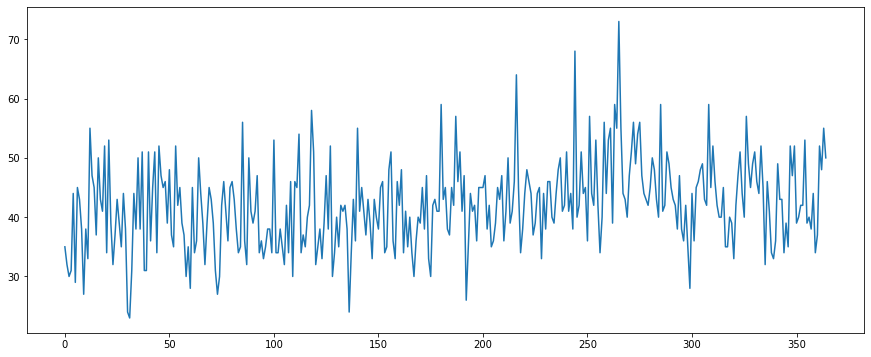

In [4]:
df.births.plot(figsize=(15, 6))
plt.show()

In [4]:
timestamp = df.births

https://primestory.tistory.com/9

# 단순 이동 평균(Simple Moving Average, SMA)
```
list = [a0, a1, a2, a3, a4, a5]
window = 3
==> [avg([a0, a1, a2]), avg([a1, a2, a3]), avg([a2, a3, a4]), avg([a3, a4, a5])]
```

## 코드 구현

In [6]:
def SMA(array, window):
    array = np.array(array)
    assert array.ndim == 1, "1차원 array만 입력할 수 있습니다."
    n = len(array)
    
    result = np.empty(n)
    result[:] = np.nan
    
    ma = []
    # 0부터 n-window까지
    for i in range(0, n-window+1):
        m = np.mean(array[i:i+window])
        ma.append(m)
    
    result[window-1:] = ma
    
    return np.array(result)

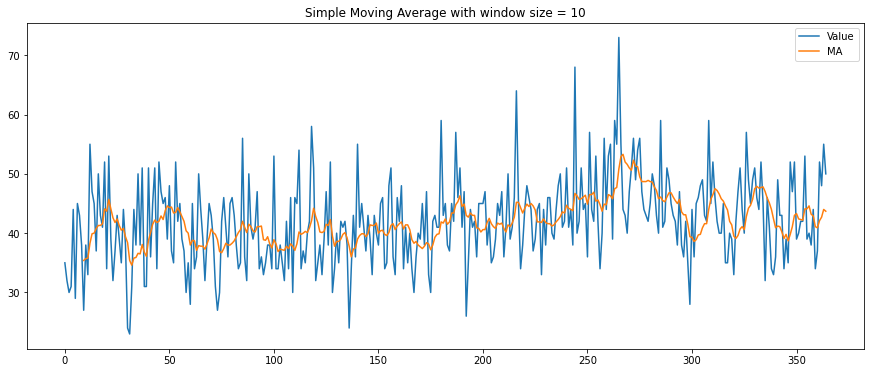

In [7]:
window = 10

sma = SMA(timestamp, window)

timestamp.plot(figsize=(15, 6))
plt.plot(sma)
plt.legend(['Value', 'MA'])
plt.title('Simple Moving Average with window size = {}'.format(window))
plt.show()

## pandas 이용

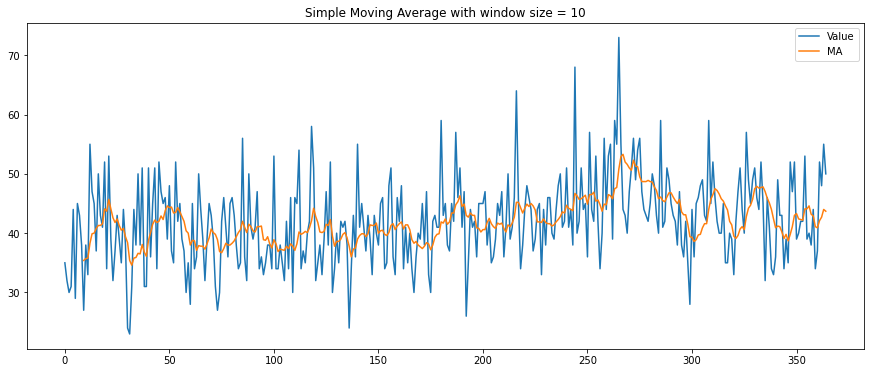

In [8]:
timestamp.plot(figsize=(15, 6))
timestamp.rolling(window=window).mean().plot()
plt.legend(['Value', 'MA'])
plt.title('Simple Moving Average with window size = {}'.format(window))
plt.show()

# 누적 이동 평균(Cumulative Moving Average, CMA)
```
list = [a0, a1, a2, a3, a4, a5]
==> [avg([a0]), avg([a0, a1]), avg([a0, a1, a2]), avg([a0, a1, a2, a3]), ..., avg([a0, a1, a2, a3, a4, a5])]
```

In [9]:
def CMA(array):
    array = np.array(array)
    assert array.ndim == 1, "1차원 array만 입력할 수 있습니다."
    n = len(array)
    
    result = []
    for i in range(n):
        m = np.mean(array[0:i+1])
        result.append(m)
        
    return np.array(result)

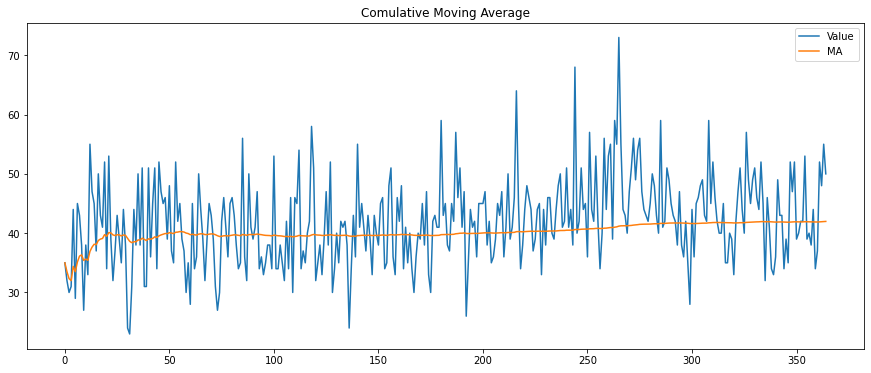

In [10]:
cma = CMA(timestamp)

timestamp.plot(figsize=(15, 6))
plt.plot(cma)
plt.legend(['Value', 'MA'])
plt.title('Comulative Moving Average')
plt.show()

# (선형)가중이동평균(Weighted Moving Average, WMA)
```
list = [a0, a1, ..., an]
window = m

A = dot product([m, m-1, ..., 1], [ai, a(i-1), ..., a(i-m+1)])
B = m + (m-1) + ... + 1

ma_i = A / B
```

In [11]:
def WMA(array, window):
    array = np.array(array)
    assert array.ndim == 1, "1차원 array만 입력할 수 있습니다."
    n = len(array)
    
    result = np.empty(n)
    result[:] = np.nan
    
    weight = np.arange(1, window+1, 1)
    
    ma = []
    # 0부터 n-window까지
    for i in range(0, n-window+1):
        A = np.sum(weight * array[i:i+window])
        B = np.sum(weight)
        m = A / B
        ma.append(m)
    
    result[window-1:] = ma
    
    return np.array(result)

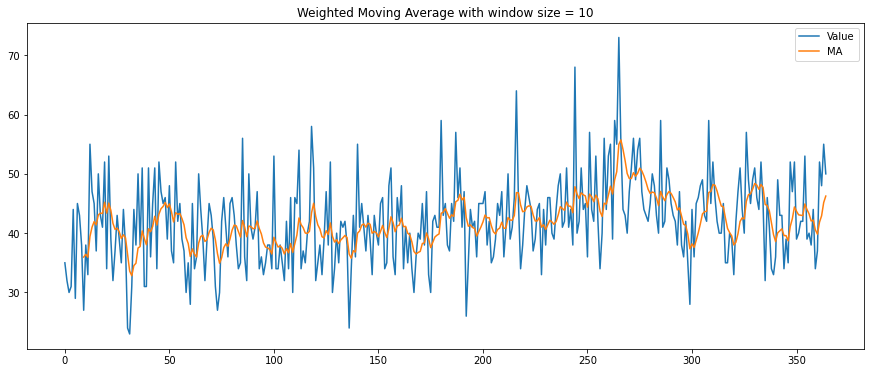

In [12]:
wma = WMA(timestamp, window)

timestamp.plot(figsize=(15, 6))
plt.plot(wma)
plt.legend(['Value', 'MA'])
plt.title('Weighted Moving Average with window size = {}'.format(window))
plt.show()

# 지수가중이동평균(Exponentially Weighted Moving Average, EWMA)
```
list = [a0, a1, ..., an]
window = m

A = dot product([1, (1-α), (1-α)^2, ..., (1-α)^(m-1)], [ai, a(i-1), ..., a(i-m+1)])
B = 1 + (1-α) + ... + (1-α)^(m-1)

ma_i = A / B
```
$
\begin{multline}
    \begin{split}
    y_t &= \frac{x_t + (1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+...} {\frac {1}{1-(1-\alpha)}} \\
        &= [x_t + (1-\alpha)x_{t-1} + (1-\alpha)^2x_{t-2} + ...]\alpha \\
        &= \alpha x_t + [(1-\alpha)x_{t-1}+ (1-\alpha)^2x_{t-2} + ...]\alpha \\
        &= \alpha x_t + (1-\alpha)[x_{t-1}+ (1-\alpha)x_{t-2} + ...]\alpha \\
        &= \alpha x_t + (1-\alpha)y_{t-1}
    \end{split}
\end{multline}
$

==> 재귀적으로 활용 가능


$ y_t$는 근사적으로 $\frac {1}{1-\alpha}$만큼의 데이터를 사용해 평균을 구하는 것과 같다고 함.  
예) α=0.98 ==> 50개의 데이터 이용 // α=0.9 ==> 10개의 데이터 이용


## 코드 구현

In [26]:
# 재귀적 계산법
def EWMA(array, alpha):
    array = np.array(array)
    assert array.ndim == 1, "1차원 array만 입력할 수 있습니다."
    n = len(array)
    
    window = int(1/(1-alpha))
    

    weight = np.array([(1-alpha)**i for i in range(0, window)])[::-1]
    ma = []
    
    # i == 0일 때
    ma.append(array[0])
    
    # 1부터 n-1까지
    for i in range(1, n):
        m = alpha * array[i] + (1-alpha) * ma[-1] # alpha * x_i + (1-alpha) * y_(t-1)
        ma.append(m)
    
    return np.array(ma)

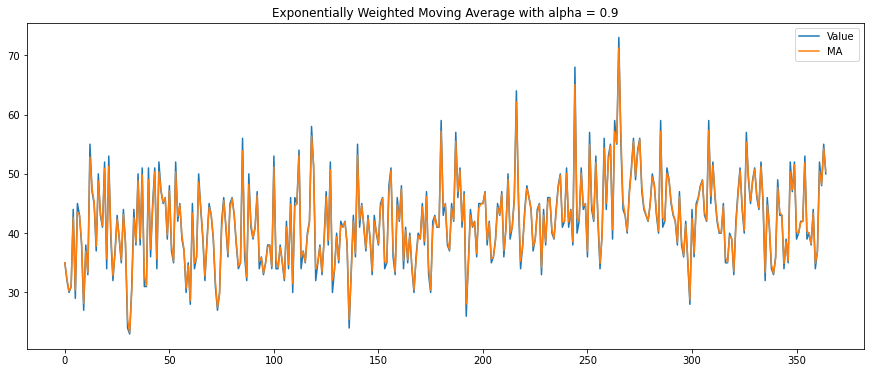

In [27]:
alpha = 0.9

ewma = EWMA(timestamp, alpha)

timestamp.plot(figsize=(15, 6))
plt.plot(ewma)
plt.legend(['Value', 'MA'])
plt.title('Exponentially Weighted Moving Average with alpha = {}'.format(alpha))
plt.show()

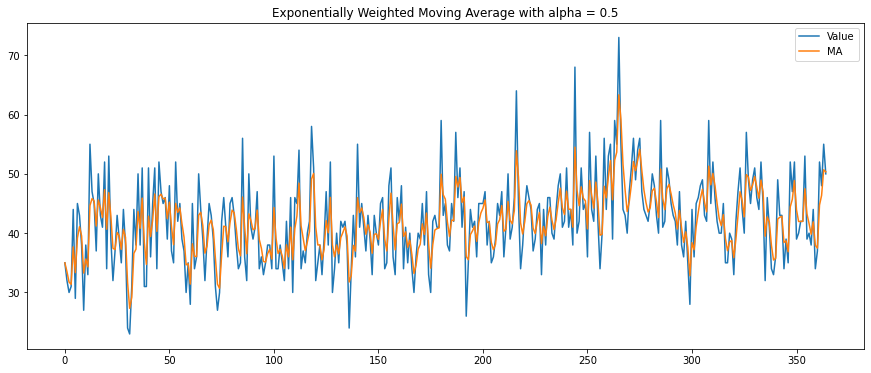

In [28]:
alpha = 0.5

ewma = EWMA(timestamp, alpha)

timestamp.plot(figsize=(15, 6))
plt.plot(ewma)
plt.legend(['Value', 'MA'])
plt.title('Exponentially Weighted Moving Average with alpha = {}'.format(alpha))
plt.show()

## pandas 이용
- `adjust=False`: 재귀적 계산
- `adjust=True`: 직접 수식 계산

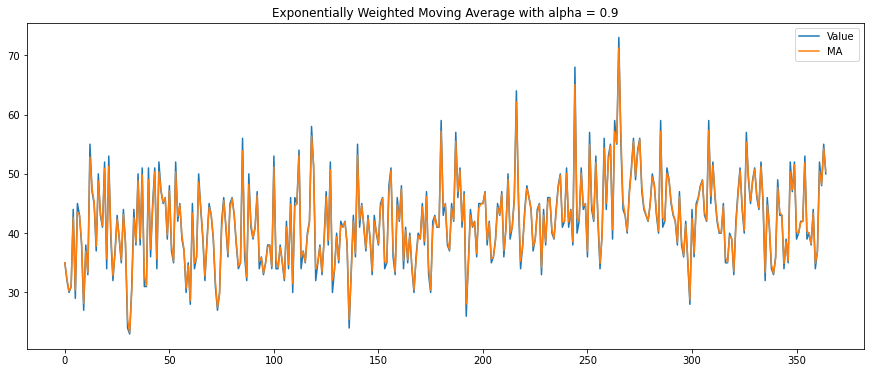

In [36]:
alpha = 0.9

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=False, alpha=alpha).mean().plot()
plt.legend(['Value', 'MA'])
plt.title('Exponentially Weighted Moving Average with alpha = {}'.format(alpha))
plt.show()

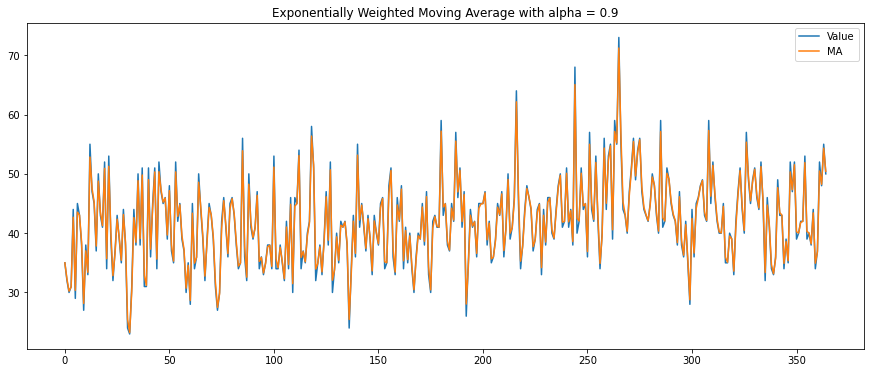

In [35]:
alpha = 0.9

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=True, alpha=alpha).mean().plot()
plt.legend(['Value', 'MA'])
plt.title('Exponentially Weighted Moving Average with alpha = {}'.format(alpha))
plt.show()

In [31]:
timestamp.ewm(adjust=False, alpha=alpha).mean().head()

0    35.0000
1    32.3000
2    30.2300
3    30.9230
4    42.6923
Name: births, dtype: float64

In [32]:
timestamp.ewm(adjust=True, alpha=alpha).mean().head()

0    35.000000
1    32.272727
2    30.225225
3    30.922592
4    42.692377
Name: births, dtype: float64

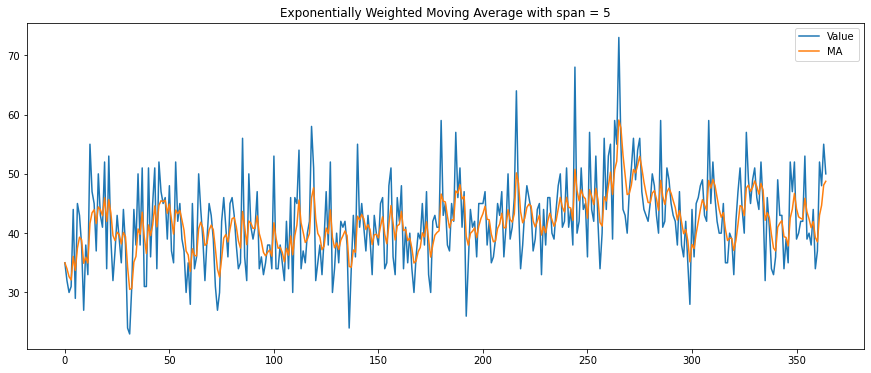

In [37]:
span = 5

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=False, span=span).mean().plot()
plt.legend(['Value', 'MA'])
plt.title('Exponentially Weighted Moving Average with span = {}'.format(span))
plt.show()

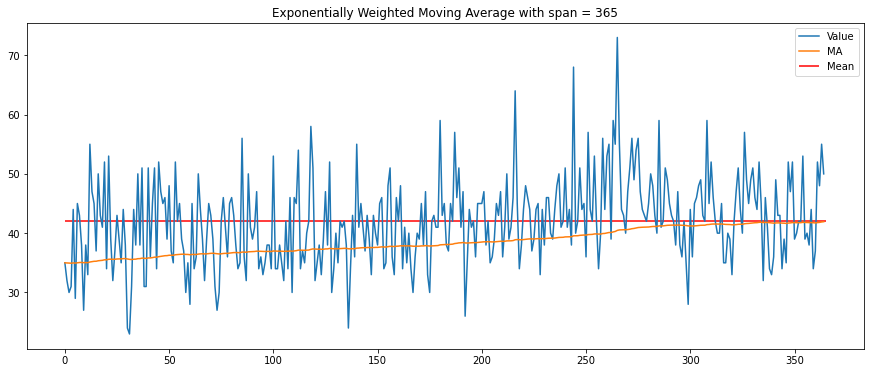

In [9]:
span = len(timestamp)

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=False, span=span).mean().plot()
plt.hlines(timestamp.mean(), xmin=0, xmax=span, color='r')
plt.legend(['Value', 'MA', 'Mean'])
plt.title('Exponentially Weighted Moving Average with span = {}'.format(span))
plt.show()

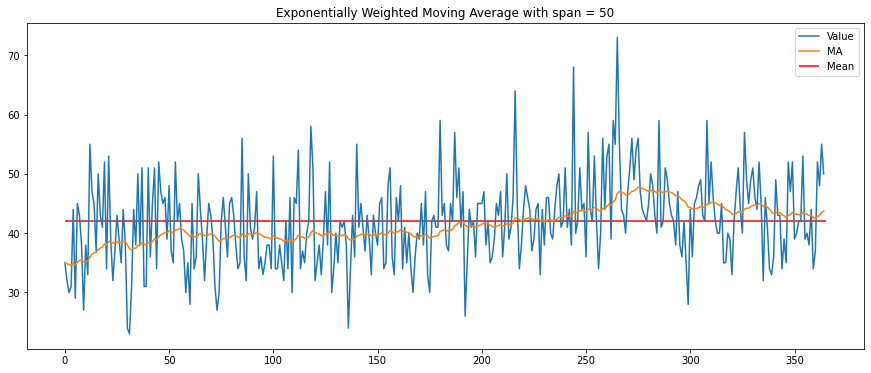

In [11]:
span = 50

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=False, span=span).mean().plot()
plt.hlines(timestamp.mean(), xmin=0, xmax=len(timestamp), color='r')
plt.legend(['Value', 'MA', 'Mean'])
plt.title('Exponentially Weighted Moving Average with span = {}'.format(span))
plt.show()

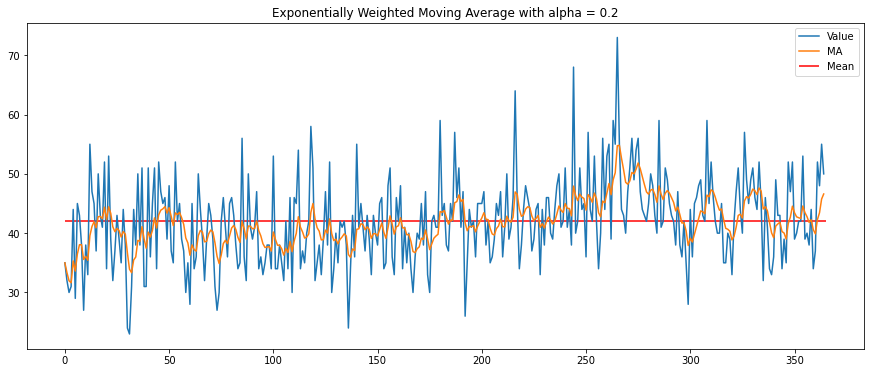

In [20]:
alpha = 0.2

timestamp.plot(figsize=(15, 6))
timestamp.ewm(adjust=True, alpha=alpha).mean().plot()
plt.hlines(timestamp.mean(), xmin=0, xmax=len(timestamp), color='r')
plt.legend(['Value', 'MA', 'Mean'])
plt.title('Exponentially Weighted Moving Average with alpha = {}'.format(alpha))
plt.show()